In [1]:
# Kevin Richard
# Neuron training for Two-dimensional inputs
# Sigmoid Activation


from IPython.display import HTML
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
from IPython import display

from IPython.display import HTML



In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [3, 3], [2, 2], [2, 3]])
Y = np.array([0, 0, 0, 1, 1, 1])
weights_plot=[]
bias_plot=[]

weights = np.random.rand(X.shape[1])
epoch =6000
learning_rate = 0.1
b=0
print(weights)

def sigmoid(z):
  return 1.0/(1.0  + np.exp(-z) )

for _ in range(epoch):

    predictions = sigmoid(np.dot(X, weights) + b)

    gradient = np.dot(X.T, (predictions - Y)) / len(Y)
    gradient_bias = np.sum(predictions - Y) / len(Y)

    weights -= learning_rate * gradient
    b -= learning_rate * gradient_bias
    weights_plot.append(weights.copy())
    bias_plot.append(b)

    loss = np.mean((predictions - Y) ** 2)

predict = sigmoid(np.dot(X, weights)+b)
print(predict)
predicted=[]
X_0 = X[Y==0]
X_1 = X[Y==1]
x = X[:,0]



[0.59491794 0.59875271]
[0.25042988 0.41195931 0.3943431  0.95798128 0.8480045  0.92125227]


[0.66722863 0.74044936]
[0, 0, 0, 1, 1, 1]


<function matplotlib.pyplot.show(close=None, block=None)>

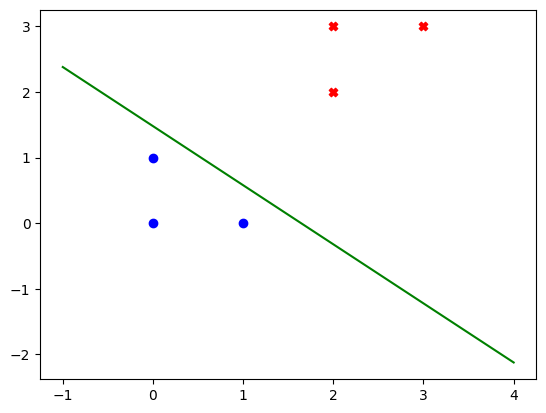

In [3]:
for i in range(len(Y)):
  if predict[i] > 0.5:
    predicted.append(1)
  else:
    predicted.append(0)

#plot

x = np.linspace(-1,4,20)
print(weights)
y = (-weights[0]/weights[1]) * x - b/weights[1]

plt.scatter(X_0[:,0],X_0[:,1], c='blue',marker='o',label='scatter plot')
plt.scatter(X_1[:,0],X_1[:,1], c='red',marker='X',label='scatter plot')
plt.plot(x, y, linestyle='-', color='green', label='Line Plot')

print(predicted)
plt.show




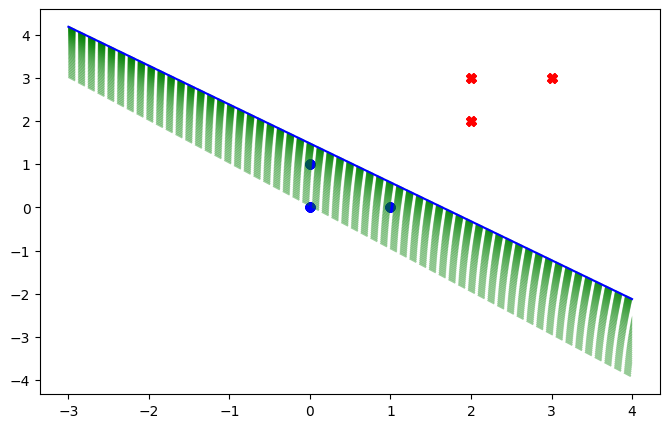

In [4]:
from IPython import display
import time
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have weights_plot and bias_plot defined

line = np.linspace(-3, 4, 10)
fig, ax = plt.subplots(figsize=(8, 5))

for i in range(len(weights_plot)):
    l = []
    slope, const = -weights_plot[i][0] / weights_plot[i][1], -bias_plot[i] / weights_plot[i][1]
    for j in range(len(line)):
        l.append(slope * line[j] + const)
    
    # Clear the previous plot
    display.clear_output(wait=True)
    
    
    # Plot the updated line
    ax.scatter(X_0[:, 0], X_0[:, 1], c='blue', marker='o')
    ax.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='X')
    ax.plot(line, l, ls='--', c='g', alpha=0.4)

    # Display the current figure
    display.display(plt.gcf())

    # Add a short pause to control the animation speed
    time.sleep(0.0001)

# Ensure the final frame is displayed
ax.plot(line, l, ls='-', c='b', alpha=1)
display.display(plt.gcf())
display.clear_output(wait=True)
